In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
num_samples = 100
sine_scale = 2 # The number of sine waves

x = np.linspace(-1, 1, num_samples)
y = np.sin(x * sine_scale * np.pi)
x_smooth = np.linspace(-1, 1, 1000)
y_smooth = np.sin(x_smooth * sine_scale * np.pi)

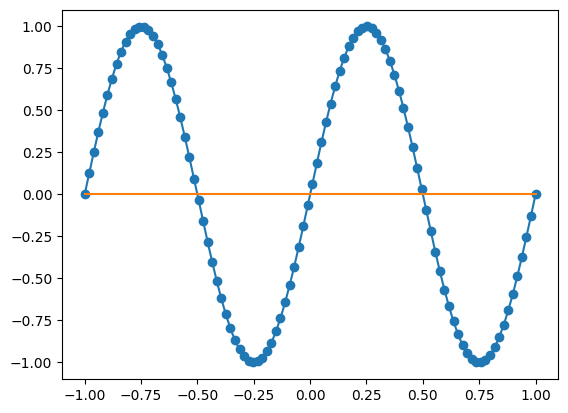

In [24]:

def plot_graph(polynomial_coefficients):
    polynomial = np.poly1d(polynomial_coefficients[::-1])
    p_smooth = polynomial(x_smooth)
    
    plt.plot(x_smooth, y_smooth)
    plt.plot(x_smooth, p_smooth)
    plt.scatter(x, y)
    plt.show()

degree = 20
polynomial_coefficients = np.zeros(degree + 1)
plot_graph(polynomial_coefficients)

In [25]:
def mse(polynomial_coefficients):
    polynomial = np.poly1d(polynomial_coefficients[::-1])
    p = polynomial(x)
    e = p - y
    return 1/(2*num_samples) * np.sum(e**2)

print(f"Initial error: {mse(polynomial_coefficients):.3g}")

Initial error: 0.247


In [26]:
X = np.vstack([x**i for i in range(degree + 1)]).T

def gradient(polynomial_coefficients):
    py = X @ polynomial_coefficients
    e = py - y
    gradient = (1/num_samples) * X.T @ e
    return gradient

print(f"Gradient: {[f'{x:.3g}' for x in gradient(polynomial_coefficients)]}")


Gradient: ['5.2e-17', '0.157', '2.32e-17', '0.133', '2.07e-17', '0.0897', '1.21e-17', '0.0617', '8.29e-18', '0.0444', '4.34e-18', '0.0331', '6.34e-18', '0.0256', '6.4e-18', '0.0202', '5.8e-18', '0.0164', '4.45e-18', '0.0135', '4.01e-18']


Step: ['5.2e-17', '0.157', '2.32e-17', '0.133', '2.07e-17', '0.0897', '1.21e-17', '0.0617', '8.29e-18', '0.0444', '4.34e-18', '0.0331', '6.34e-18', '0.0256', '6.4e-18', '0.0202', '5.8e-18', '0.0164', '4.45e-18', '0.0135', '4.01e-18']
New coefficients: ['-5.2e-17', '-0.157', '-2.32e-17', '-0.133', '-2.07e-17', '-0.0897', '-1.21e-17', '-0.0617', '-8.29e-18', '-0.0444', '-4.34e-18', '-0.0331', '-6.34e-18', '-0.0256', '-6.4e-18', '-0.0202', '-5.8e-18', '-0.0164', '-4.45e-18', '-0.0135', '-4.01e-18']
New MSE: 0.211


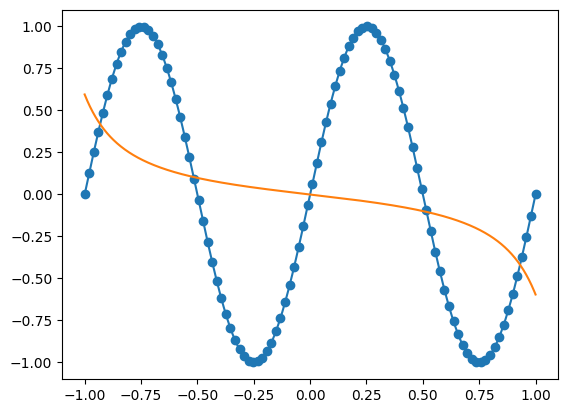

In [27]:
# Make a copy so I don't mess up original
coefficients = polynomial_coefficients.copy()

learning_rate = 1

step = learning_rate * gradient(coefficients)
print(f"Step: {[f'{x:.3g}' for x in step]}")

coefficients -= learning_rate * gradient(coefficients)
print(f"New coefficients: {[f'{x:.3g}' for x in coefficients]}")

print(f"New MSE: {mse(coefficients):.3g}")
plot_graph(coefficients)


Epoch 0 - Error: 0.211
Epoch 10000 - Error: 0.0152
Epoch 20000 - Error: 0.00833
Epoch 30000 - Error: 0.00508
Epoch 40000 - Error: 0.00354
Epoch 50000 - Error: 0.00279
Epoch 60000 - Error: 0.00241
Epoch 70000 - Error: 0.00221
Epoch 80000 - Error: 0.00209
Epoch 90000 - Error: 0.002
Final error: 0.00194


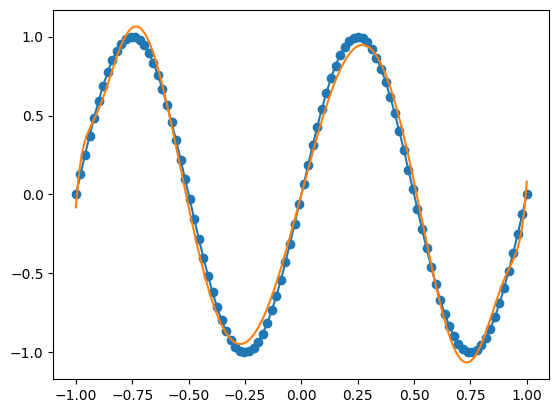

In [28]:
coefficients = polynomial_coefficients.copy()
epochs = 100_000

for epoch in range(epochs):
    step = learning_rate * gradient(coefficients)
    coefficients -= step
    error = mse(coefficients)
    if epoch % 10_000 == 0:
        print(f"Epoch {epoch} - Error: {error:.3g}")
    
print(f"Final error: {mse(coefficients):.3g}")
plot_graph(coefficients)